In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

In [4]:
#EX3
df = pd.read_csv('./Data Files/iris.csv')
data = df[df['species'].isin(['setosa'])==False]

train = data.iloc[:,:-1].values
test =  data.iloc[:,-1]
test, unique = pd.factorize(test)

for label in unique:
    print(label, ':', list(unique).index(label))

versicolor : 0
virginica : 1


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(train, test, test_size=0.2, random_state=37)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80, 4)
(80,)
(20, 4)
(20,)


In [6]:
# sklearn method
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pre = model.predict(X_test)

score = accuracy_score(Y_test, Y_pre)
print('Accuracy score:', score)

coef = model.coef_
print('weight:', coef)

intercept = model.intercept_
print('bias:', intercept)

prob = model.predict_proba(X_test)
print('prob:', prob)

matrix = confusion_matrix(Y_test, Y_pre)
print(Y_test)
print(Y_pre)

Accuracy score: 0.95
weight: [[-1.62470121 -1.54460106  2.44564173  2.18509679]]
bias: [-0.91808722]
prob: [[0.1642435  0.8357565 ]
 [0.83699131 0.16300869]
 [0.07347625 0.92652375]
 [0.06640695 0.93359305]
 [0.65875556 0.34124444]
 [0.35854001 0.64145999]
 [0.40141089 0.59858911]
 [0.05407718 0.94592282]
 [0.29351365 0.70648635]
 [0.52655601 0.47344399]
 [0.2189569  0.7810431 ]
 [0.91306594 0.08693406]
 [0.62116955 0.37883045]
 [0.85600039 0.14399961]
 [0.89222692 0.10777308]
 [0.24375342 0.75624658]
 [0.86575569 0.13424431]
 [0.08722668 0.91277332]
 [0.71906292 0.28093708]
 [0.21321213 0.78678787]]
[1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1]
[1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1]


Y = sigmoid(-0.918 + (-1.6247)*sepal_length + (-1.5446)*sepal_width + 2.4456*petal_length + 2.1851*petal_width)

In [7]:
# sigmoid method
# w = w - alpha*(zi-yi)*xi with zi = sigmoid(f(xi))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def logistic_classifier(X, Y, weight_init, alpha, max_iter, omega):
    count_ = 0
    N = X.shape[0]
    w = np.concatenate((np.zeros((1, X.shape[1])), weight_init), axis=0)
    while count_ < max_iter:
        per = np.random.permutation(N)
        for row in per:
            xi = X[row,:].reshape(1,-1)
            yi = Y[row]
            zi = sigmoid(np.dot(xi, w[-1].T))
            w_update = w[-1] - alpha*(zi - yi)*xi
            count_ += 1
            if np.linalg.norm(w_update - w[-1]) < omega:
                return w[-1]
                break
            w = np.concatenate((w, w_update), axis=0)
    return w[-1]

zeros = np.zeros((X_train.shape[0], 1))
X = np.concatenate((zeros, X_train), axis=1)
Y = Y_train
weight_init = np.random.rand(X.shape[1]).reshape(-1,X.shape[1])
alpha = 0.01
omega = 1e-5
max_iter = 1e6

w_final = logistic_classifier(X, Y, weight_init, alpha, max_iter, omega)
print(w_final)

[ 0.17555803 -3.36857005 -3.5271613   4.9287497   4.52211797]


In [8]:
zeros = np.zeros((X_test.shape[0], 1))
X_test_ = np.concatenate((zeros, X_test), axis=1)

Y_prob = sigmoid(np.dot(X_test_, w_final.T))
print(Y_prob)

def y_pre(y_prob, thershold):
    y_pre = np.where(y_prob>thershold, 1, 0)
    return y_pre

y_pred = y_pre(Y_prob, 0.6)
print(y_pred)
print(Y_test)
score_cal = accuracy_score(Y_test, y_pred)
print('Accuracy score by calculation:', score_cal)

[0.97422441 0.04786721 0.99472633 0.99653836 0.26526629 0.79578593
 0.63952835 0.99779486 0.87373152 0.57875422 0.94107439 0.01198104
 0.3058583  0.03360658 0.01726726 0.93322119 0.03595937 0.99296964
 0.18440089 0.94682201]
[1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1]
[1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1]
Accuracy score by calculation: 0.95


sklearn = 95% better than calculation = 90% but threshold = 0.6 then calculation = 95%

In [265]:
#EX6
df = pd.read_csv('./Data Files/boston.csv')
print(df.shape)

column = df.columns
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [266]:
def center(data, k):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(data)

    label_pre = km.predict(data)
    center = km.cluster_centers_
    
    return center

center(df, 3)

array([[ 3.74992678e-01,  1.57103825e+01,  8.35953552e+00,
         7.10382514e-02,  5.09862568e-01,  6.39165301e+00,
         6.04133880e+01,  4.46074481e+00,  4.45081967e+00,
         3.11232240e+02,  1.78177596e+01,  3.83489809e+02,
         1.03886612e+01,  2.49316940e+01],
       [ 1.09105113e+01,  5.32907052e-15,  1.85725490e+01,
         7.84313725e-02,  6.71225490e-01,  5.98226471e+00,
         8.99137255e+01,  2.07716373e+00,  2.30196078e+01,
         6.68205882e+02,  2.01950980e+01,  3.71803039e+02,
         1.78740196e+01,  1.74294118e+01],
       [ 1.52190382e+01, -5.32907052e-15,  1.79268421e+01,
         2.63157895e-02,  6.73710526e-01,  6.06550000e+00,
         8.99052632e+01,  1.99442895e+00,  2.25000000e+01,
         6.44736842e+02,  1.99289474e+01,  5.77863158e+01,
         2.04486842e+01,  1.31263158e+01]])

In [257]:
param_grid = {'n_clusters': np.arange(1,100)}
km1 = KMeans()
model_cv = GridSearchCV(km1, param_grid = param_grid, cv=5)
model_cv.fit(df)

best_para = model_cv.best_params_
best_score = model_cv.best_score_
print('best param:', best_para['n_clusters'], 'with score:', best_score)

center_best = center(df, best_para['n_clusters'])


best param: 98 with score: -171781.97303630452


In [321]:
def KMeans(X, k):
    center_init = X.iloc[np.random.choice(X.shape[0], k, replace=False)]
    center = center_init
    center_pre = np.zeros((k+1, X.shape[1]))
    iter_ = 0
    
    while True:        
        dist = cdist(X, center)
        label = np.argmin(dist, axis=1)
        center_list = np.zeros((1, X.shape[1]))
        
        for lb in range(k):
            Xi = X.iloc[label==lb,:]
            center_new = np.mean(Xi, axis=0).to_frame()
            center_list = np.concatenate((center_list, center_new.T), axis=0)
            
        if (center_list == center_pre).all():
            return center_list[1:], iter_, label
            break

        center_pre = center_list
        center = center_list[1:]
        iter_ += 1
KMeans(df, 3)        

(array([[3.74992678e-01, 1.57103825e+01, 8.35953552e+00, 7.10382514e-02,
         5.09862568e-01, 6.39165301e+00, 6.04133880e+01, 4.46074481e+00,
         4.45081967e+00, 3.11232240e+02, 1.78177596e+01, 3.83489809e+02,
         1.03886612e+01, 2.49316940e+01],
        [1.09105113e+01, 0.00000000e+00, 1.85725490e+01, 7.84313725e-02,
         6.71225490e-01, 5.98226471e+00, 8.99137255e+01, 2.07716373e+00,
         2.30196078e+01, 6.68205882e+02, 2.01950980e+01, 3.71803039e+02,
         1.78740196e+01, 1.74294118e+01],
        [1.52190382e+01, 0.00000000e+00, 1.79268421e+01, 2.63157895e-02,
         6.73710526e-01, 6.06550000e+00, 8.99052632e+01, 1.99442895e+00,
         2.25000000e+01, 6.44736842e+02, 1.99289474e+01, 5.77863158e+01,
         2.04486842e+01, 1.31263158e+01]]),
 4,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Result of calculation is the same sklearn

In [188]:
print(np.zeros((1, 3)))

[[0. 0. 0.]]


In [247]:
#EX9
df = pd.read_csv('./Data Files/diabetes.csv')

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [248]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size= 0.2)

In [250]:
# pipeline = Pipeline([('StandardScaler', StandardScaler()), ('KNeighborsClassifier', KNN())])

std = StandardScaler()
X_train_transform = std.fit_transform(X_train)
X_test_transform = std.transform(X_test)

knn = KNN()
param = {'n_neighbors': np.arange(1,100),
         'weights': ['uniform', 'distance'],
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
grid_model = GridSearchCV(knn, param_grid = param, cv=5)

grid_model.fit(X_train_transform, Y_train)

y_pre = grid_model.predict(X_test_transform)

best_para = grid_model.best_params_
best_score = grid_model.best_score_
print('best param:', best_para, 'with score:', best_score)

best param: {'algorithm': 'auto', 'n_neighbors': 72, 'weights': 'uniform'} with score: 0.749185667752443


In [251]:
knn_best = KNN(n_neighbors=best_para['n_neighbors'], weights=best_para['weights'])
knn_best.fit(X_train, Y_train)
prob = knn_best.predict_proba(X_test)[:,0]

def y_pred(X, threshold):
    y_pred = np.where(X>threshold,0,1)
    return y_pred

th = np.linspace(0.1,0.9,9)

th_best = 0.1
score_best = 0
for i in th:
    Y_pre = y_pred(prob, i)
    score = accuracy_score(Y_test, Y_pre)
    if score_best < score:
        score_best = score
        th_best = i
        
print('Score best:', score_best, 'with thershold best:', th_best)

Score best: 0.7792207792207793 with thershold best: 0.5


In [252]:
# Not standardScaler

knn1 = KNN()
param = {'n_neighbors': np.arange(1,100)}
grid_model1 = GridSearchCV(knn1, param_grid = param, cv=5)

grid_model1.fit(X_train, Y_train)

y_pre = grid_model1.predict(X_test)

best_para = grid_model1.best_params_
best_score = grid_model1.best_score_
print('best param:', best_para['n_neighbors'], 'with score:', best_score)

best param: 39 with score: 0.7345276872964169


In [19]:
#EX12
df = pd.read_csv('./Data Files/gapminder.csv')

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
print(X.shape)
print(Y.shape)

(139, 8)
(139,)


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=37)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(111, 8)
(28, 8)
(111,)
(28,)


In [21]:
std = StandardScaler()
X_train_transform = std.fit_transform(X_train)
X_test_transform = std.transform(X_test)

In [22]:
#not transform
rg = LinearRegression()
rg.fit(X_train, Y_train)

y_pre = rg.predict(X_test)
score = rg.score(X_test, Y_test)
print('score:', score)

bias = rg.intercept_
weight = rg.coef_
print('w0:', bias)
print('w:', weight)

score: 0.8973385063475549
w0: 155.9685607480509
w: [ 1.32886455e-08  1.48359729e+01 -5.80963213e-01 -3.97396254e-01
 -1.17053375e+00  2.64701140e-04  3.23979375e-01 -2.43865861e+00]


In [23]:
#transform
rg = LinearRegression()
rg.fit(X_train_transform, Y_train)

y_pre = rg.predict(X_test_transform)
score = rg.score(X_test_transform, Y_test)
print('score:', score)

bias = rg.intercept_
weight = rg.coef_
print('w0:', bias)
print('w:', weight)

score: 0.8973385063475735
w0: 43.57657657657663
w: [  1.5673675   23.61669409  -2.35398797  -2.64199233  -2.60135001
   5.14842697   1.42338398 -21.58192202]


transform and not transform are the same score

In [24]:
# calcutation: w = (X_.T*X)-1*X_.T*Y
def linear_regression(X, Y):
    X_ = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
    w = np.dot(np.linalg.pinv(np.dot(X_.T, X_)), np.dot(X_.T, Y))
    return w

linear_regression(X_train_transform, Y_train)

array([ 43.57657658,   1.5673675 ,  23.61669409,  -2.35398797,
        -2.64199233,  -2.60135001,   5.14842697,   1.42338398,
       -21.58192202])

Result is the same sklearn

In [25]:
#Ridge
param = {'alpha': np.arange(0.01,0.1,0.01)}
ridge_model = GridSearchCV(Ridge(), param_grid=param, cv=5)

ridge_model.fit(X_test_transform, Y_test)

y_pre = ridge_model.predict(X_test_transform)


best_alpha = ridge_model.best_params_['alpha']
best_score = ridge_model.best_score_
print('alpha:', best_alpha)
print('score:', best_score)

alpha: 0.09
score: 0.7130004129468925


In [26]:
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_test_transform, Y_test)

y_pre = best_ridge.predict(X_test_transform)
print('score best:{}'.format(best_ridge.score(X_test_transform, Y_test)))

print('score weight: w={}'.format([best_ridge.intercept_, best_ridge.coef_]))

score best:0.9154666265531829
score weight: w=[45.551675034902146, array([ -0.72481952,  17.36401802,  -5.80387625,  -0.09390025,
        -5.85010321,   1.52968961,  -5.69399184, -29.21740749])]


Ridge: f(x) + alpha * norm(w, 2) 

In [27]:
#Lasso
param = {'alpha': np.arange(0.01,0.1,0.01)}
lasso_model = GridSearchCV(Lasso(), param_grid=param, cv=5)

lasso_model.fit(X_test_transform, Y_test)

y_pre = lasso_model.predict(X_test_transform)


best_alpha = lasso_model.best_params_['alpha']
best_score = lasso_model.best_score_
print('alpha:', best_alpha)
print('score:', best_score)

alpha: 0.09
score: 0.7208789806937944


In [28]:
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_test_transform, Y_test)

y_pre = best_lasso.predict(X_test_transform)
print('score best:{}'.format(best_lasso.score(X_test_transform, Y_test)))

print('score weight: w={}'.format([best_lasso.intercept_, best_lasso.coef_]))

score best:0.9153338962728188
score weight: w=[45.55809230486733, array([ -0.19113559,  17.51110632,  -5.51603735,  -0.        ,
        -5.73968735,   1.2362094 ,  -5.29721307, -28.56620458])]


This problem Lasso is weaker than Ridge

Lasso: f(x) + alpha * norm(w, 1)

In [29]:
#ElasticNet
param = {'alpha': np.arange(0.01,0.1,0.01),
         'l1_ratio':np.arange(1e-4,0.1,1e-4)
        }

elasticnet_model = GridSearchCV(ElasticNet(), param_grid=param, cv=5)

elasticnet_model.fit(X_test_transform, Y_test)

y_pre = elasticnet_model.predict(X_test_transform)


best_alpha = elasticnet_model.best_params_['alpha']
best_p = elasticnet_model.best_params_['l1_ratio']
best_score = elasticnet_model.best_score_
print('alpha:', best_alpha)
print('p:', best_p)
print('score:', best_score)

alpha: 0.09
p: 0.0001
score: 0.7572298499811566


In [77]:
best_elasticnet = ElasticNet(alpha=best_alpha, l1_ratio = best_p)
best_elasticnet.fit(X_test_transform, Y_test)

y_pre = best_elasticnet.predict(X_test_transform)
print('score best:{}'.format(best_elasticnet.score(X_test_transform, Y_test)))

print('score weight: w={}'.format([best_elasticnet.intercept_, best_elasticnet.coef_]))

score best:0.36646992957341473
score weight: w=[0.31506231238702126, array([ 0.13666513,  0.17377916, -0.0227183 , -0.02482983,  0.01126211,
        0.07204492,  0.05251265, -0.00841485])]


ElasticNet have weaker than ridge and lasso but not better than linear
<br> ridge is the bettest model
<br> ElasticNet = f(x) + alpha*p*norm(w, 1) + 1/2*alpha*(1-p)*norm(w, 2)

In [96]:
#EX15
df = pd.read_csv('./Data Files/diabetes.csv')

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size= 0.2)

std = StandardScaler()
X_train_transform = std.fit_transform(X_train)
X_test_transform = std.transform(X_test)
print(Y_test.values)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [98]:
def model(X, Y, grid, param, model_):
    if grid == 1:
        param_grid = param
        cl = GridSearchCV(model_, param_grid = param, cv=5, scoring='accuracy')
        cl.fit(X, Y)
    else:
        cl = model_
        cl.fit(X, Y)
    return cl

def predict(X, Y, model, grid):
    y_pre = model.predict(X)
    if grid == 1:
        best_param = model.best_params_
        best_score = model.best_score_
        return best_score, best_param
    else:
        score = model.score(X, Y)
        y_pre = model.predict(X)
        return score, y_pre

In [99]:
#KNN

knn = KNN()
param = {'n_neighbors': np.arange(1,100)}

knn_model = model(X_train_transform, Y_train, 1, param, knn)
best_score, best_param = predict(X_test_transform, Y_test, knn_model, 1)
print('score:', best_score)
print('param:', best_param)

score: 0.749185667752443
param: {'n_neighbors': 72}


In [100]:
#Logistic

logistic = LogisticRegression()
param = None

logistic_model = model(X_train_transform, Y_train, 0, param, logistic)
best_score, y_pre = predict(X_test_transform, Y_test, logistic_model, 0)
print('score:', best_score)
print('y_pre:', y_pre)

score: 0.8246753246753247
y_pre: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [101]:
#GaussianNB

gaussian = GaussianNB()
param = None

gaussian_model = model(X_train_transform, Y_train, 0, param, gaussian)
best_score, y_pre = predict(X_test_transform, Y_test, gaussian_model, 0)
print('score:', best_score)
print('y_pre:', y_pre)

score: 0.7922077922077922
y_pre: [1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [328]:
#BernoulliNB

bernoulli = BernoulliNB()
param = {'alpha': np.arange(0.1,10,0.1)}

bernoulli_model = model(X_train_transform, Y_train, 1, param, bernoulli)
best_score, best_param = predict(X_test_transform, Y_test, bernoulli_model, 1)
print('score:', best_score)
print('param:', best_param)
# print(bernoulli.grid_scores_)

score: 0.7084690553745928
param: {'alpha': 6.8}


In [103]:
#SVM linear

svm_linear = SVC(kernel='linear')
param = None

svm_linear_model = model(X_train_transform, Y_train, 0, param, svm_linear)
best_score, y_pre = predict(X_test_transform, Y_test, svm_linear_model, 0)
print('score:', best_score)
print('y_pre:', y_pre)

score: 0.8246753246753247
y_pre: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [104]:
#SVM_poly

svm_poly = SVC()
param = {'kernel': ['poly'],
         'C': np.arange(1,10,1),
         'degree': np.arange(1,10,1),
         'coef0': np.arange(0.01,0.1,0.01)
        }

svm_poly_model = model(X_train_transform, Y_train, 1, param, svm_poly)
best_score, best_param = predict(X_test_transform, Y_test, svm_poly_model, 1)
print('score:', best_score)
print('param:', best_param)

score: 0.760586319218241
param: {'C': 3, 'coef0': 0.01, 'degree': 1, 'kernel': 'poly'}


In [105]:
#SVM_simoid

svm_sigmoid = SVC()
param = {'kernel': ['sigmoid'],
         'C': np.arange(1,10,0.1),
         'coef0': np.arange(0.01,0.1,0.01)
        }

svm_sigmoid_model = model(X_train_transform, Y_train, 1, param, svm_sigmoid)
best_score, best_param = predict(X_test_transform, Y_test, svm_sigmoid_model, 1)
print('score:', best_score)
print('param:', best_param)

score: 0.6986970684039088
param: {'C': 2.7000000000000015, 'coef0': 0.060000000000000005, 'kernel': 'sigmoid'}


In [106]:
#SVM_rbf

svm_rbf = SVC()
param = {'kernel': ['rbf'],
         'C': np.arange(1,10,0.1)
        }

svm_rbf_model = model(X_train_transform, Y_train, 1, param, svm_rbf)
best_score, best_param = predict(X_test_transform, Y_test, svm_rbf_model, 1)
print('score:', best_score)
print('param:', best_param)

score: 0.744299674267101
param: {'C': 1.1, 'kernel': 'rbf'}


In [107]:
#DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
param = {'max_depth': np.arange(1,100,1),
         'max_features': np.arange(1,X.shape[1],1)
        }

decisiontree_model = model(X_train_transform, Y_train, 1, param, decisiontree)
best_score, best_param = predict(X_test_transform, Y_test, decisiontree_model, 1)
print('score:', best_score)
print('param:', best_param)


score: 0.744299674267101
param: {'max_depth': 8, 'max_features': 2}


In [108]:
decision_best = DecisionTreeClassifier(max_depth = best_param['max_depth'], max_features= best_param['max_features'])

decision_best.fit(X_train_transform, Y_train)
y_pre = decision_best.predict(X_test_transform)
print(y_pre)

score = decision_best.score(X_test_transform, Y_test)
print('score:', score)

feature = decision_best.feature_importances_
print(feature)

[1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0]
score: 0.7272727272727273
[0.10564643 0.30317646 0.0461522  0.03268472 0.08982415 0.13449932
 0.10738773 0.18062899]


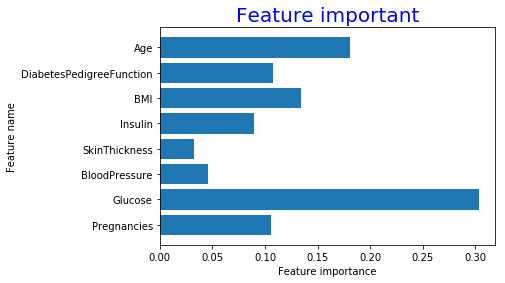

In [109]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    plt.title('Feature important', fontsize=20, color='b')
    plt.show()
    
plot_feature_importances(decision_best, X.columns)

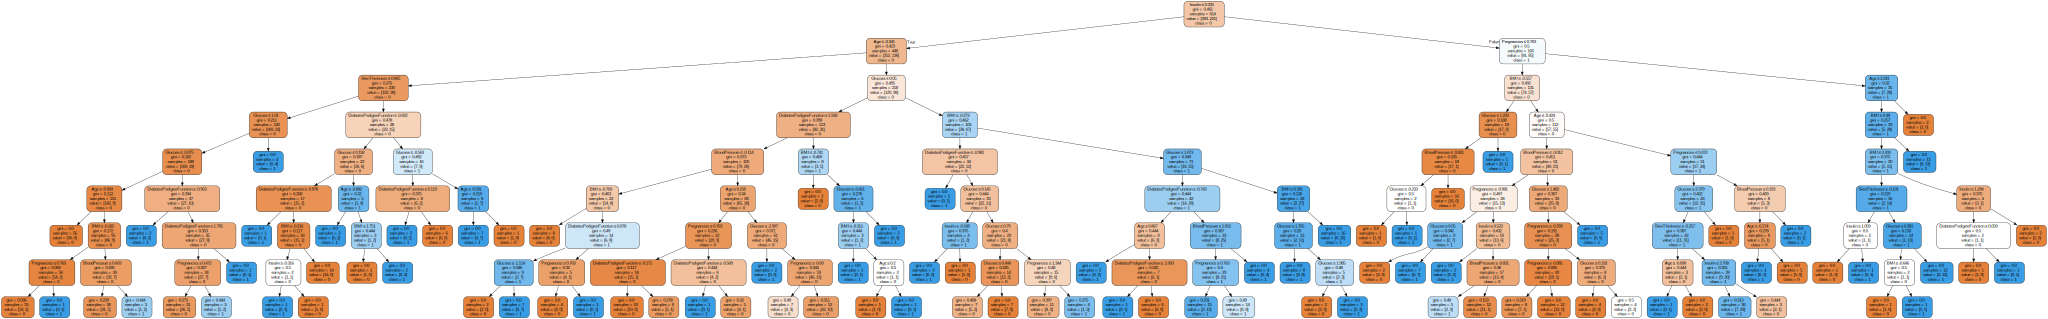

In [110]:
def graph(clf, feature, class_):
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                    feature_names=feature,  
                                    class_names=class_,  
                                    filled=True, rounded=True,  
                                    special_characters=True) 
    graph = graphviz.Source(dot_data)
    return graph

graph(decision_best, X.columns, ['0','1'])

In [111]:
#Random forest
forest = RandomForestClassifier()

param = {'n_estimators': np.arange(1,15,1),
         'max_depth': np.arange(1,20,1),
         'max_features': np.arange(1,X.shape[1],1)
        }

forest_model = model(X_train_transform, Y_train, 1, param, forest)
best_score, best_param = predict(X_test_transform, Y_test, forest_model, 1)
print('score:', best_score)
print('param:', best_param)

score: 0.7736156351791531
param: {'max_depth': 3, 'max_features': 3, 'n_estimators': 13}


In [112]:
#BaggingClassifier

bagging = BaggingClassifier()

param = {'n_estimators': np.arange(1,15,1),
         'max_samples': np.arange(1,20,1),
         'max_features': np.arange(1,X.shape[1],1)
        }

bagging_model = model(X_train_transform, Y_train, 1, param, bagging)
best_score, best_param = predict(X_test_transform, Y_test, bagging_model, 1)
print('score:', best_score)
print('param:', best_param)

score: 0.750814332247557
param: {'max_features': 5, 'max_samples': 18, 'n_estimators': 11}


In [113]:
#GradientBoostingClassifier

gradientboosting = GradientBoostingClassifier()

param = {'learning_rate': np.arange(0.01,0.1,0.01),
         'n_estimators': np.arange(5,15,1),
         'max_depth': np.arange(1,10,1),
         'max_features': np.arange(1,X.shape[1],1)
        }

gradientboosting_model = model(X_train_transform, Y_train, 1, param, gradientboosting)
best_score, best_param = predict(X_test_transform, Y_test, gradientboosting_model, 1)
print('score:', best_score)
print('param:', best_param)

score: 0.7752442996742671
param: {'learning_rate': 0.09, 'max_depth': 3, 'max_features': 6, 'n_estimators': 12}


In [116]:
#MLP classifier

mlp = MLPClassifier()

param = {'hidden_layer_sizes': np.arange(1,10,1),
         'activation': ['logistic', 'tanh', 'relu'],
         'solver': ['lbfgs', 'sgd', 'adam'],
         'max_iter': [10000]
        }

mlp_model = model(X_train_transform, Y_train, 1, param, mlp)
best_score, best_param = predict(X_test_transform, Y_test, mlp_model, 1)
print('score:', best_score)
print('param:', best_param)

score: 0.7671009771986971
param: {'activation': 'relu', 'hidden_layer_sizes': 3, 'max_iter': 10000, 'solver': 'adam'}


In [ ]:
a = AgglomerativeClustering()